<a href="https://colab.research.google.com/github/NikitaZhdakaev/Python_HomeWork/blob/master/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1. 

В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?

In [2]:
import random
import pandas as pd

lst = ['robot'] * 20
lst += ['human'] * 20
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()

,whoAmI
0,robot
1,human
2,human
3,robot
4,robot


In [ ]:
# new_data = pd.get_dummies(data, columns=['whoAmI'])
# new_data

In [8]:
# Функция заполнения столбцов
def one_hot(row):
    if row['whoAmI'] == 'robot':
        row['robot'] = 1
        row['human'] = 0
    else:
        row['human'] = 1
        row['robot'] = 0
    return row

# добавляем новые столбцы 
data = data.assign(whoAmI=lst).apply(one_hot, axis=1)
data.head()

,human,robot,whoAmI
0,0,1,robot
1,1,0,human
2,1,0,human
3,0,1,robot
4,0,1,robot


In [9]:
data.corr()

,human,robot
human,1.0,-1.0
robot,-1.0,1.0


<Axes: >

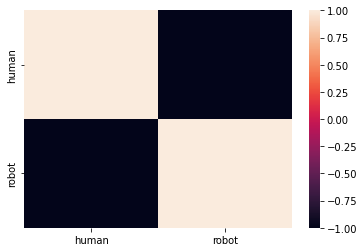

In [10]:
import seaborn as sns
sns.heatmap(data.corr())

In [11]:
# Как видим по тепловой карте, возможно два варианта, либо робот, либо человек))
# Для анализа введу еще один столбец, например, степень участия робота/человека 
# в гипотетичесокм проекте.

data['participation']=[random.randint(0, 100) for i in range(len(lst))]
data.head(10)

,human,robot,whoAmI,participation
0,0,1,robot,97
1,1,0,human,7
2,1,0,human,44
3,0,1,robot,69
4,0,1,robot,1
5,1,0,human,7
6,0,1,robot,54
7,1,0,human,82
8,0,1,robot,27
9,0,1,robot,21


In [12]:
data.describe()

,human,robot,participation
count,40.00000,40.00000,40.000000
mean,0.50000,0.50000,49.525000
std,0.50637,0.50637,32.996494
min,0.00000,0.00000,1.000000
25%,0.00000,0.00000,19.750000
50%,0.50000,0.50000,48.500000
75%,1.00000,1.00000,76.500000
max,1.00000,1.00000,99.000000


<Axes: xlabel='participation', ylabel='robot'>

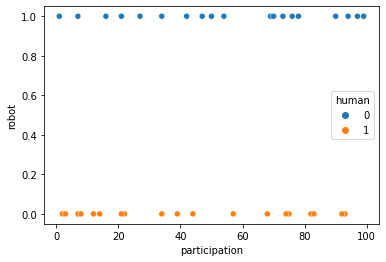

In [13]:
import seaborn
sns.scatterplot(data=data, x='participation', y='robot', hue = 'human')

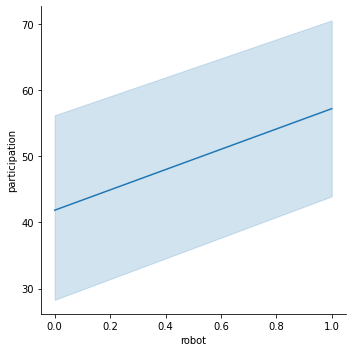

In [14]:
sns.relplot(data=data, x='robot', y='participation', kind = 'line')

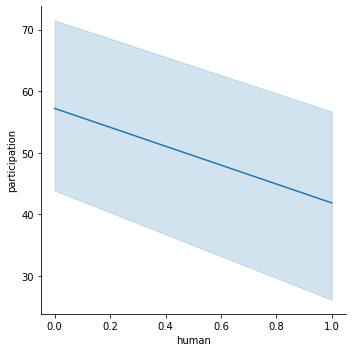

In [15]:
sns.relplot(data=data, x='human', y='participation', kind = 'line')

<Axes: xlabel='participation', ylabel='Count'>

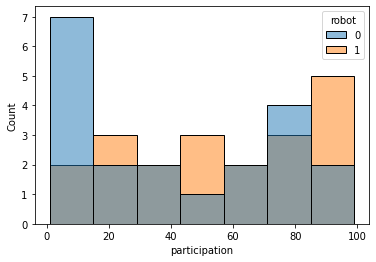

In [16]:
sns.histplot(data=data, x='participation', hue='robot')

<Axes: >

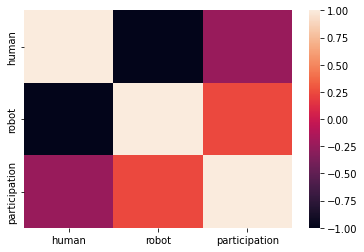

In [17]:
sns.heatmap(data.corr())